In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd as xl
import seaborn as sns

df = pd.read_csv("Formulir tanpa judul (Jawaban) - Form Responses 1.csv")
df

,Timestamp,Kelas,Jenis Kelamin,Uang
0,03/12/2023 0:37:57,B,Perempuan,1500000
1,03/12/2023 0:38:26,D,Laki-Laki,1000000
2,03/12/2023 0:39:15,D,Laki-Laki,1500000
3,03/12/2023 0:39:44,A,Perempuan,2500000
4,03/12/2023 0:40:09,C,Laki-Laki,1200000
5,03/12/2023 0:40:30,B,Perempuan,1000000
6,03/12/2023 1:01:49,C,Perempuan,480000
7,03/12/2023 5:45:21,C,Perempuan,300000
8,03/12/2023 6:25:33,D,Perempuan,400000
9,03/12/2023 6:26:05,D,Perempuan,400000


In [4]:
df.describe()

,Uang
count,4.900000e+01
mean,8.307143e+05
std,5.908028e+05
min,3.000000e+05
25%,4.000000e+05
50%,5.000000e+05
75%,1.200000e+06
max,2.500000e+06


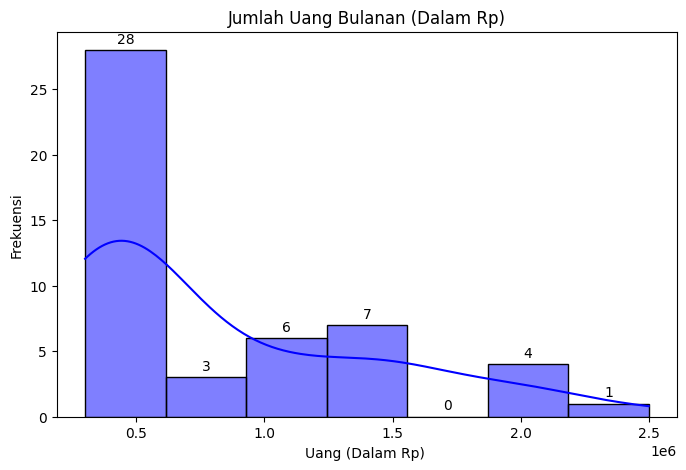

In [15]:
df['Uang'] = pd.to_numeric(df['Uang'], errors='coerce')
# Create a subplot for the histogram of monthly income
fig, ax = plt.subplots(figsize=(8, 5))
# Histogram of monthly income
sns.histplot(df['Uang'].dropna(), kde=True, color='blue', edgecolor='black', alpha=0.5, ax=ax)

# Add population count above each bin
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_title('Jumlah Uang Bulanan (Dalam Rp)')
ax.set_xlabel('Uang (Dalam Rp) ')
ax.set_ylabel('Frekuensi')

# Display the plot
plt.show()

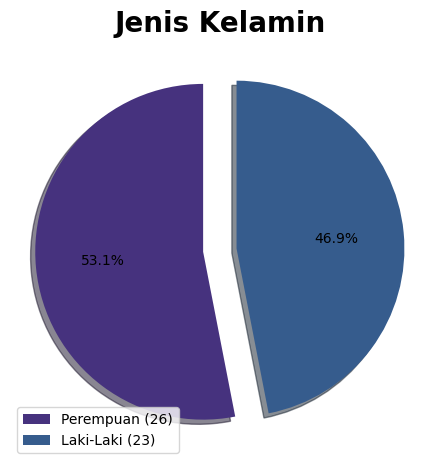

In [6]:
slices = df['Jenis Kelamin'].value_counts()
explode = [0.1, 0.1]
labels = [f"{label} ({count})" for label, count in zip(slices.index, slices.values)]
plt.pie(slices, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Jenis Kelamin", fontweight="bold", fontsize=20)
plt.legend(labels, loc=3, fontsize=10)
plt.tight_layout()
plt.show()

In [7]:
std_dev = df['Berapakah Jumlah Uang Bulanan Anda (ex 500000 tidak pakai titik atau koma) '].std()
mean = np.mean(df['Berapakah Jumlah Uang Bulanan Anda (ex 500000 tidak pakai titik atau koma) '])
median = np.median(df['Berapakah Jumlah Uang Bulanan Anda (ex 500000 tidak pakai titik atau koma) '])
print(f"Median dari Kolom 'Uang': {median}")
print(f"Mean dari Kolom 'Uang': {mean}")
print(f"Deviasi Standar dari Kolom 'Uang': {std_dev}")

KeyError: 'Berapakah Jumlah Uang Bulanan Anda (ex 500000 tidak pakai titik atau koma) '